In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import os

infile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/compare_BSseq_EMseq_result/cobining_EXTENDEDsmwithMajorSM/BS_melanoma_cfDNA_relative.txt'
majorlineagefile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/compare_BSseq_EMseq_result/cobining_EXTENDEDsmwithMajorSM/BS_majorlineageSM.txt'

outname=infile+"_"+os.path.basename(majorlineagefile)+"_zscore"

indf=pd.read_csv(infile,sep='\t',index_col='Mixture')
indf.head()

,YU ID,Naive CD4 T,Naive CD8,Naive B,NK,Mono,Mac (M0),Mac (M1),Mac (M2),iDC,...,CD4 TEM,CD8 TEMRA,Megakaryocyte,CD4 TCM,Erythrocyte,Memory B,CD8TIL,Total,Response,Toxicity
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUCLUE_20-3998-cfDNA,YUCLUE,2.493639,2.464160,2.490712,3.141181,4.396388,4.806204,4.119200,3.264635,4.716480,...,3.705564,3.496888,11.678026,3.197163,8.854778,2.034696,2.610428,100,NDB,NaN
tot-YUMARS_15-3443-cfDNA,YUMARS,2.494741,2.525881,2.529701,3.624588,5.597168,5.382108,4.511471,3.157593,4.364970,...,3.837251,3.462013,11.058916,3.186244,8.419081,1.977156,2.580922,100,DCB,NaN
tot-YUMICRO_20-4006-cfDNA,YUMICRO,3.328265,3.491512,3.306904,2.868509,4.253649,5.836782,5.787147,4.643044,4.217909,...,5.294548,3.189113,8.359426,4.619817,5.500469,2.522093,2.391333,100,NDB,NaN
tot-YUMOTE_17-3755-cfDNA,YUMOTE,2.728999,2.936065,2.912076,2.629696,5.241654,5.774284,5.465563,3.550091,3.929663,...,4.593062,2.964417,10.225553,3.977248,7.891040,2.374546,2.636142,100,NDB,NaN
tot-YUPRAF_19-3925-cfDNA,YUPRAF,2.680527,2.696936,2.587731,3.112085,5.621401,4.968412,4.521435,3.304701,4.160581,...,4.420184,3.933808,8.091075,4.129331,6.133583,1.957386,3.268887,100,DCB,1.0


In [2]:
indf.loc[indf['Toxicity']>2,'irAE']='Severe irAE'
indf.loc[indf['Toxicity']<=2,'irAE']='No severe irAE'

In [3]:
toxdf=indf[indf['Toxicity'].notna()]
toxdf.shape

(15, 27)

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.748e-02 U_stat=1.200e+01


(<matplotlib.axes._subplots.AxesSubplot at 0x7faf94cfc4e0>,
 [<statannot.StatResult.StatResult at 0x7faf94dac2e8>])

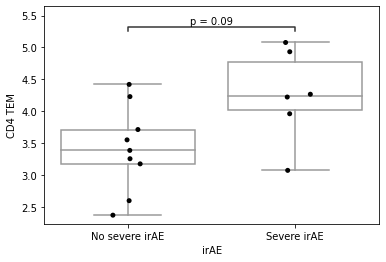

In [4]:
y='CD4 TEM'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdf

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
#plt.savefig(outfile + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.924e-02 U_stat=8.000e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7faf94e85748>,
 [<statannot.StatResult.StatResult at 0x7faf94deb128>])

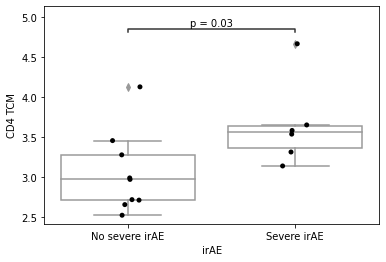

In [5]:
y='CD4 TCM'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdf

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
#plt.savefig(outfile + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

In [6]:
majorlineageDF=pd.read_csv(majorlineagefile,sep='\t',index_col='Mixture')
majorlineageDF.head()

,Mono,Bcell,CD4,CD8,NK
Mixture,,,,,
Y-3674-cfDNA,64.967443,6.123511,7.537161,7.654764,13.717121
Y-3685-cfDNA,56.367785,7.374727,10.657174,9.571538,16.028775
Y-3688-cfDNA,44.519744,11.976250,13.739127,11.347472,18.417407
Y-3694-cfDNA,57.912697,7.876848,12.929012,7.551904,13.729540
Y-3703-cfDNA,51.785331,8.075110,12.069571,11.975249,16.094739


In [7]:
majorlineageDF.shape

(35, 5)

In [8]:
toxdfmerged_with_majorSM=toxdf.merge(majorlineageDF,how='inner',left_index=True,right_index=True)
toxdfmerged_with_majorSM.shape

(15, 32)

In [9]:
toxdfmerged_with_majorSM.head()

,YU ID,Naive CD4 T,Naive CD8,Naive B,NK_x,Mono_x,Mac (M0),Mac (M1),Mac (M2),iDC,...,CD8TIL,Total,Response,Toxicity,irAE,Mono_y,Bcell,CD4,CD8,NK_y
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUPRAF_19-3925-cfDNA,YUPRAF,2.680527,2.696936,2.587731,3.112085,5.621401,4.968412,4.521435,3.304701,4.160581,...,3.268887,100,DCB,1.0,No severe irAE,56.196056,8.166483,15.055818,9.405084,11.176560
tot-YUTAUR_19-3926-cfDNA,YUTAUR,2.771289,2.776680,2.974914,2.818570,4.350046,4.832852,3.825769,3.115073,4.671348,...,2.714369,100,NDB,3.0,Severe irAE,66.816954,7.747746,8.433764,8.161446,8.840090
tot-YUTHEA_20-4000-cfDNA,YUTHEA,2.522323,2.405377,2.850539,2.874306,4.311861,4.661645,4.245958,3.186905,4.209391,...,3.025842,100,DCB,1.0,No severe irAE,51.557802,11.538136,12.270180,11.464133,13.169749
Y-3674-cfDNA,YUTACI,2.605752,2.188441,2.441870,3.292435,5.037876,4.821285,3.857961,2.619172,4.592556,...,4.740623,100,DCB,0.0,No severe irAE,64.967443,6.123511,7.537161,7.654764,13.717121
Y-3688-cfDNA,YUTORY,2.959900,2.953132,2.667324,3.089844,4.106894,6.180695,5.321778,3.316228,4.561571,...,1.047482,100,NDB,3.0,Severe irAE,44.519744,11.976250,13.739127,11.347472,18.417407


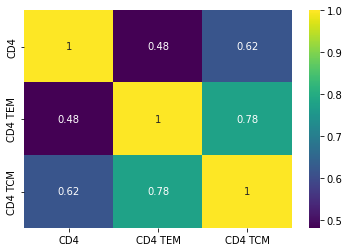

In [10]:
onlythosethreeCT=toxdfmerged_with_majorSM[['CD4','CD4 TEM','CD4 TCM']]
corr = onlythosethreeCT.corr(method='pearson')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='viridis',annot=True)
plt.savefig(infile + '_CD4thosethree_crosscorrelation.pdf', bbox_inches='tight')

In [11]:
toxdfmerged_with_majorSM['CD4TCM_dividedby_CD4']=toxdfmerged_with_majorSM['CD4 TCM']/toxdfmerged_with_majorSM['CD4']
toxdfmerged_with_majorSM['CD4TEM_dividedby_CD4']=toxdfmerged_with_majorSM['CD4 TEM']/toxdfmerged_with_majorSM['CD4']
toxdfmerged_with_majorSM.head()

,YU ID,Naive CD4 T,Naive CD8,Naive B,NK_x,Mono_x,Mac (M0),Mac (M1),Mac (M2),iDC,...,Response,Toxicity,irAE,Mono_y,Bcell,CD4,CD8,NK_y,CD4TCM_dividedby_CD4,CD4TEM_dividedby_CD4
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUPRAF_19-3925-cfDNA,YUPRAF,2.680527,2.696936,2.587731,3.112085,5.621401,4.968412,4.521435,3.304701,4.160581,...,DCB,1.0,No severe irAE,56.196056,8.166483,15.055818,9.405084,11.176560,0.274268,0.293586
tot-YUTAUR_19-3926-cfDNA,YUTAUR,2.771289,2.776680,2.974914,2.818570,4.350046,4.832852,3.825769,3.115073,4.671348,...,NDB,3.0,Severe irAE,66.816954,7.747746,8.433764,8.161446,8.840090,0.419513,0.505824
tot-YUTHEA_20-4000-cfDNA,YUTHEA,2.522323,2.405377,2.850539,2.874306,4.311861,4.661645,4.245958,3.186905,4.209391,...,DCB,1.0,No severe irAE,51.557802,11.538136,12.270180,11.464133,13.169749,0.267192,0.344639
Y-3674-cfDNA,YUTACI,2.605752,2.188441,2.441870,3.292435,5.037876,4.821285,3.857961,2.619172,4.592556,...,DCB,0.0,No severe irAE,64.967443,6.123511,7.537161,7.654764,13.717121,0.334777,0.449087
Y-3688-cfDNA,YUTORY,2.959900,2.953132,2.667324,3.089844,4.106894,6.180695,5.321778,3.316228,4.561571,...,NDB,3.0,Severe irAE,44.519744,11.976250,13.739127,11.347472,18.417407,0.260843,0.369591


No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.597e-01 U_stat=2.500e+01


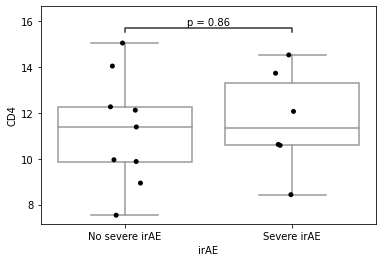

In [12]:
y='CD4'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.159e-01 U_stat=1.600e+01


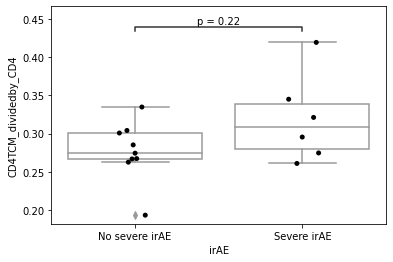

In [13]:
y='CD4TCM_dividedby_CD4'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.753e-01 U_stat=1.500e+01


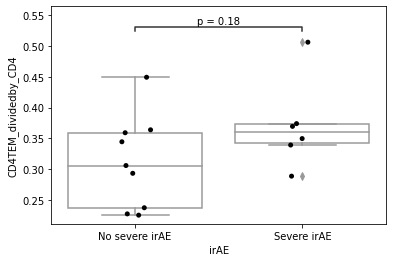

In [14]:
y='CD4TEM_dividedby_CD4'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

In [15]:
col='CD4TEM_dividedby_CD4'
toxdfmerged_with_majorSM[col+" (z-score)"] = (toxdfmerged_with_majorSM[col] - toxdfmerged_with_majorSM[col].mean())/toxdfmerged_with_majorSM[col].std(ddof=0)


col='CD4TCM_dividedby_CD4'
toxdfmerged_with_majorSM[col+" (z-score)"] = (toxdfmerged_with_majorSM[col] - toxdfmerged_with_majorSM[col].mean())/toxdfmerged_with_majorSM[col].std(ddof=0)

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.753e-01 U_stat=1.500e+01


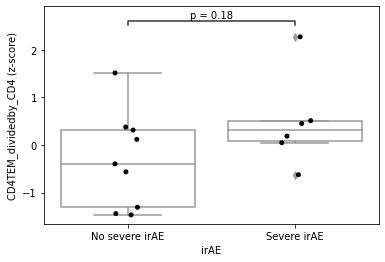

In [16]:
y='CD4TEM_dividedby_CD4 (z-score)'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.159e-01 U_stat=1.600e+01


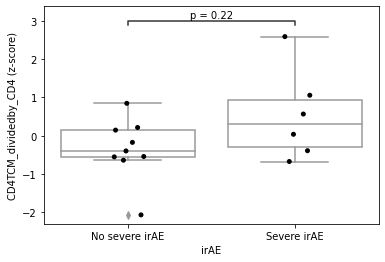

In [17]:
y='CD4TCM_dividedby_CD4 (z-score)'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

In [18]:
toxdfmerged_with_majorSM.to_csv(outname+".txt",sep='\t')